In [3]:
import pandas as pd

In [4]:
df1 = pd.read_csv('04_store_member.csv')
print(df1.shape)
df1.head()

(4396, 6)


,회원번호,회원상태,성별,결혼유무,주소,생년
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967.0
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0


In [5]:
df2 = pd.read_csv('04_store_product_1.csv')
print(df2.shape)
df2.head()

(130893, 11)


,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50301001,채소,과일채소,딸기,딸기(1kg),1.0,13600,매장1,NaN,2102
1,20170201,80201053,간식,떡,가래떡,현미가래떡(400g),1.0,99999999,매장1,NaN,2102
2,20170201,110104033,음료,음료,음료기타,개복숭아감식초(700ml),1.0,13000,매장1,NaN,2103
3,20170201,40203001,과실,견과,잣,잣(220g:1병),1.0,14800,매장1,NaN,2105
4,20170201,50417002,채소,뿌리채소,우엉,우엉(300g),1.0,3400,매장1,NaN,2105


In [6]:
df3 = df2.pivot_table(index='회원번호', values=['구매금액', '구매수량'], aggfunc='sum').reset_index()

In [7]:
pd.merge(df3, df1, on='회원번호', how='inner') #상황에 맞게끔 판단하다.

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년
0,2102,102093159,472.5,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
1,2103,7904400,1586.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0
2,2104,389040,112.0,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0
3,2105,3067930,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0
4,2106,54550,25.0,정상회원,여,NaN,경기 용인시 수지구 상현동,1953.0
...,...,...,...,...,...,...,...,...
1378,6471,1600,1.0,정상회원,여,미혼,경기 성남시 분당구 수내2동,1972.0
1379,6474,709400,175.0,탈퇴,여,NaN,경기 용인시 수지구 성복동,1950.0
1380,6478,2600,1.0,정상회원,여,기혼,서울 강남구 압구정동 구현대,1945.0
1381,6489,22100,14.0,정상회원,여,미혼,경기 고양시 덕양구 화정1동,1959.0


In [8]:
pd.merge(df3, df1, on='회원번호', how='right')

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년
0,2101,NaN,NaN,정상회원,여,기혼,서울 강북구 미아동 134-,1967.0
1,2102,102093159.0,472.5,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
2,2103,7904400.0,1586.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0
3,2104,389040.0,112.0,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0
4,2105,3067930.0,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0
...,...,...,...,...,...,...,...,...
4391,6492,NaN,NaN,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.0
4392,6493,NaN,NaN,정상회원,여,기혼,서울 관악구 행운동 1681,1982.0
4393,6494,NaN,NaN,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.0
4394,6495,NaN,NaN,정상회원,여,기혼,서울 용산구 한남동 737-,1961.0


In [9]:
pd.merge(df2, df1, on='회원번호', how='outer')

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,회원상태,성별,결혼유무,주소,생년
0,20170201.0,50301001.0,채소,과일채소,딸기,딸기(1kg),1.0,13600.0,매장1,NaN,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
1,20170201.0,80201053.0,간식,떡,가래떡,현미가래떡(400g),1.0,99999999.0,매장1,NaN,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
2,20170202.0,50198223.0,채소,잎/줄기채소,루꼴라,루꼴라(100g),1.0,2000.0,매장1,NaN,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
3,20170202.0,50303004.0,채소,과일채소,방울토마토,방울토마토/대추형(500g),1.0,3100.0,매장1,NaN,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
4,20170202.0,50705005.0,채소,버섯,양송이버섯,갈색양송이버섯(140g),1.0,2800.0,매장1,NaN,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963.0
133902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982.0
133903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975.0
133904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961.0


In [10]:
df4 = pd.merge(df3, df1, on='회원번호', how='inner')

In [11]:
df4['연령'] = 2021 - df4['생년']

In [12]:
df4

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년,연령
0,2102,102093159,472.5,정상회원,여,NaN,경기 용인시 수지구 동천동,1947.0,74.0
1,2103,7904400,1586.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972.0,49.0
2,2104,389040,112.0,정상회원,여,NaN,경기 용인시 수지구 성복동,1969.0,52.0
3,2105,3067930,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948.0,73.0
4,2106,54550,25.0,정상회원,여,NaN,경기 용인시 수지구 상현동,1953.0,68.0
...,...,...,...,...,...,...,...,...,...
1378,6471,1600,1.0,정상회원,여,미혼,경기 성남시 분당구 수내2동,1972.0,49.0
1379,6474,709400,175.0,탈퇴,여,NaN,경기 용인시 수지구 성복동,1950.0,71.0
1380,6478,2600,1.0,정상회원,여,기혼,서울 강남구 압구정동 구현대,1945.0,76.0
1381,6489,22100,14.0,정상회원,여,미혼,경기 고양시 덕양구 화정1동,1959.0,62.0


In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='AppleGothic')

In [14]:
df4.pivot_table(index='성별', values=['구매금액','구매수량'], aggfunc='sum')

,구매금액,구매수량
성별,,
남,36626115,7401.65
여,809091939,144515.65


In [15]:
df4['성별'].value_counts()

여    1270
남     112
Name: 성별, dtype: int64

<AxesSubplot:xlabel='성별', ylabel='구매금액'>

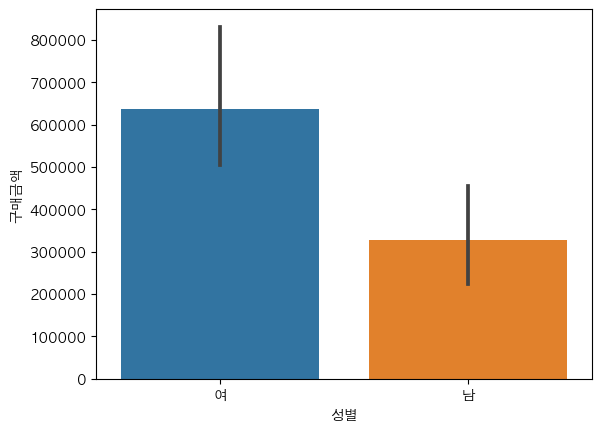

In [16]:
sns.barplot(data=df4, x='성별', y='구매금액') #평균

<AxesSubplot:xlabel='성별', ylabel='구매금액'>

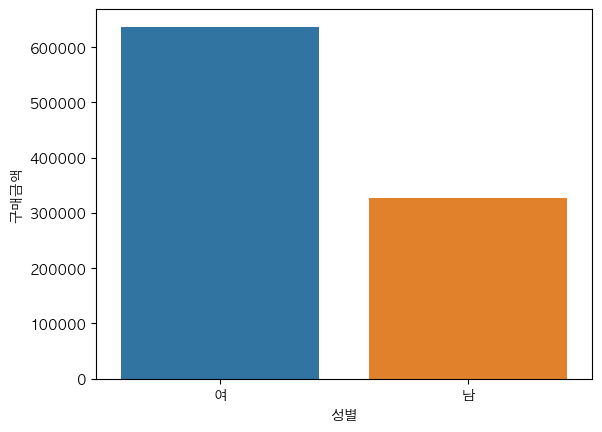

In [17]:
sns.barplot(data=df4, x='성별', y='구매금액', ci=None)

<AxesSubplot:xlabel='성별', ylabel='구매금액'>

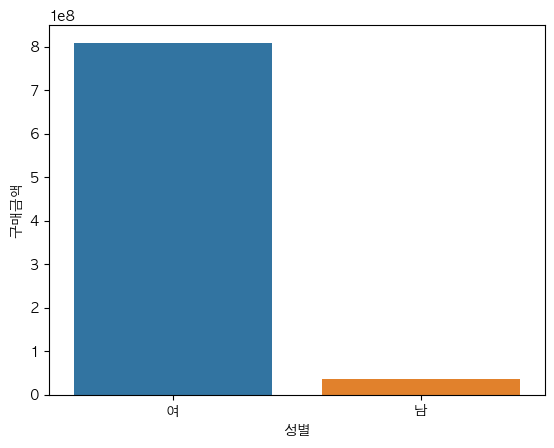

In [18]:
sns.barplot(data=df4, x='성별', y='구매금액', ci=None, estimator=sum)

<AxesSubplot:xlabel='연령', ylabel='구매수량'>

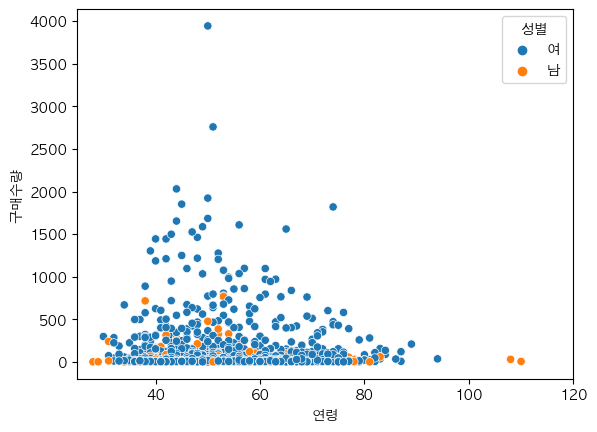

In [21]:
plt.xlim([25,120])
sns.scatterplot(data=df4, x='연령', y='구매수량', hue='성별')